## Formulate SSA for the System from (6.1)

1. For each molecule, compute its x-coordinate at time $t+\Delta t$ according to the following steps:

    - Generate a normally distributed (with zero mean and unit variance) random number $\xi .$
    
    - $X(t+\Delta t)=X(t)+\sqrt{2 D \Delta t} \xi$
    
    - If $X(t+\Delta t)<0$, $X(t+\Delta t)=-X(t)-\sqrt{2 D \Delta t} \xi$
    
    - If $X(t+\Delta t)>L$, $X(t+\Delta t)=2 L-X(t)-\sqrt{2 D \Delta t} \xi$
    
    - continue
    
2. For each molecule, generate a random number $r_{1}$ uniformly distributed in the interval $(0,1) .$ If $r_{1}<k_{1} \Delta t,$ then remove the molecule from the system.

3. Generate a random number $r_{2}$ uniformly distributed in the interval $(0,1) .$ If $r_{2}<\left(k_{2} h^{2} L / 5\right) \Delta t,$ then generate another random number $r_{3}$ uniformly distributed in the interval $(0,1)$ and introduce a new molecule at the position with $x$ -coordinate equal to $r_{3} L / 5$

4. Go back to 1

## SSA for Reaction-Diffusion System with Velocity-Jump Process

To include velocity-jump process, we replace the step 1 in the algorithm above with the following steps:

- Generate a random number $r$ uniformly distributed in $(0,1) .$

- Compute the position of the molecule at time $t+\Delta t$ by $X(t+\Delta t)=X(t)+V(t) \Delta t$

- If $X(t+\Delta t)<0$, $X(t+\Delta t)=-X(t)-V(t) \Delta t$ and $V(t+\Delta t)=-V(t)$

- If $X(t+\Delta t)>0$, then $X(t+\Delta t)=2 L-X(t)-V(t) \Delta t$ and $V(t+\Delta t)=-V(t)$

- Let $\lambda=\frac{s^{2}}{2 D}$, where $s$ is the magnitude of velocity. If $r<\lambda\Delta t$, then put $V(t+\Delta t)=-V(t)$.

The following code implements what describes above:

In [11]:
import numpy as np
from numpy.random import uniform

def evol1d(length,dt,ttot,lam,dcoeff,k1,k2):
    v = []
    xs = [] # no molecule at the beginning
    t = 0
    while t<ttot:
        for i,x in enumerate(xs):
            x = x+v[i]*dt
            r = uniform()
            if x<0:
                xs[i] = -x
                v[i] = -v[i]
            elif x>length:
                xs[i] = 2*length-x
                v[i] = -v[i]
            else:
                xs[i] = x
                if r<lam*dt:
                    v[i] = -v[i]
            if uniform()<k1*dt:
                xs.pop(i)
                v.pop(i)
        if uniform()<k2:
            xs.append(uniform()*length/5)
            v.append(np.sqrt(2*lam*dcoeff))
        t+=dt
    return xs

In [12]:
D = 0.0001
Lam = 1
Dt = 0.1
L = 1
T = 600
K1 = 0.0001
K2 = 0.025
rep = 1
res = []
for p in range(rep):
    res+=evol1d(L,Dt,T,Lam,D,K1,K2)

Text(0, 0.5, 'Pr{x(10min)=x}')

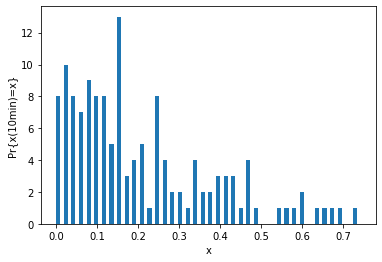

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(res,bins=40,width=0.01)
plt.xlabel('x')
plt.ylabel('Pr{x(10min)=x}')